# 4 $M_\odot$ ZAMS 1000x 
Preliminary CBM analysis.

In [1]:
%pylab nbagg
from ppmpy import ppm
data_dir='/data/ppm_rpod2/YProfiles/'

from __future__ import print_function
from builtins import range

from nugridpy.utils import colourblind as cb

Populating the interactive namespace from numpy and matplotlib


In [2]:
# select project 
project='M4ZAMS'
ppm.set_YProf_path(data_dir+project)

In [3]:
# show the available cases for this project (case=run):
ppm.cases

['Z1']

In [4]:
Z1=ppm.yprofile('Z1')

<IPython.core.display.Javascript object>


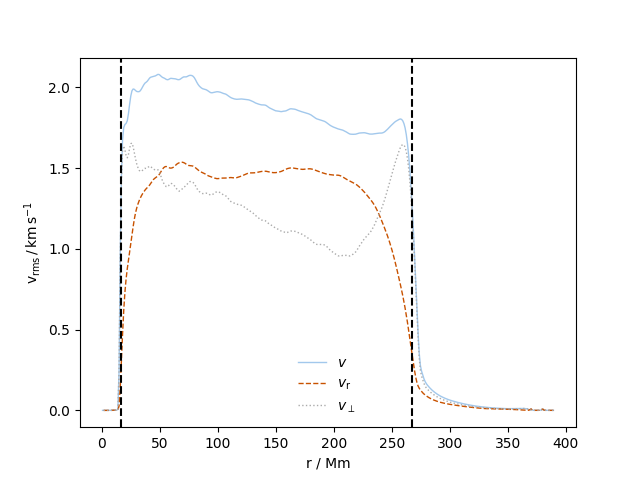

In [5]:
Z1.vprofs(100)

<IPython.core.display.Javascript object>


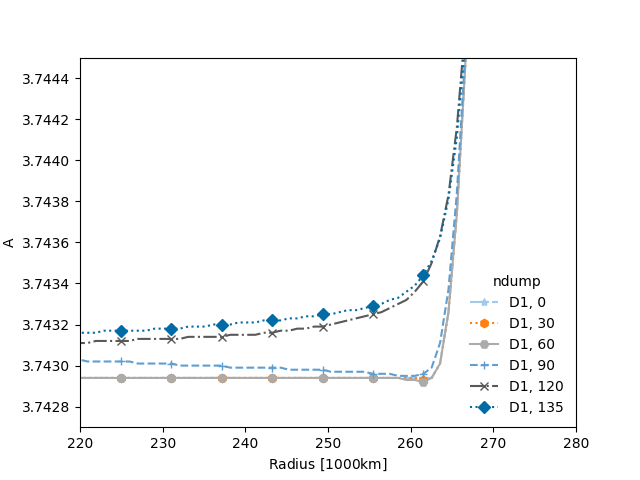

(220, 280)

In [6]:
# plot a profile
ifig=109;close(ifig);figure(ifig)
#ything='FV H+He'
ything='A'
cycs=[0,30,60,90,120,135]
Z1.prof_time(cycs,yaxis_thing=ything,radtop=8.0848,ifig=ifig,ls_offset=10,label_case='D1')

#xlim(3.5,9.2)
#ylim(-8,0)    # FV H+He
#ylim(0.10209, 0.10262) # log A
ylim(3.7427,3.7445)
xlim(220,280)

<IPython.core.display.Javascript object>


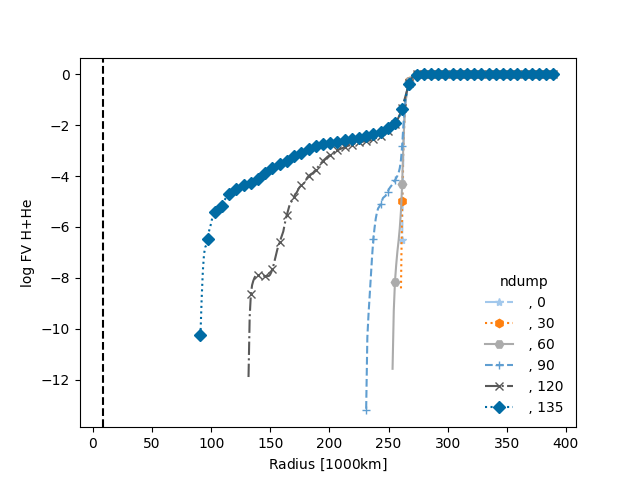

/home/user/PyPPM/ppmpy/ppm.py:1728: RuntimeWarning: divide by zero encountered in log10
  pl.plot(Y,np.log10(y),utils.linestyle(i+ls_offset)[0],


In [7]:
# plot a profile
ifig=110;close(ifig);figure(ifig)
ything='FV H+He'
#ything='A'
#cycs=[0,100]
Z1.prof_time(cycs,yaxis_thing=ything,radtop=8.0848,ifig=ifig,ls_offset=10,\
             logy=True)

#xlim(3.5,9.2)
#ylim(-4,0)    # FV H+He
#ylim(0.10209, 0.10262) # log A

<IPython.core.display.Javascript object>


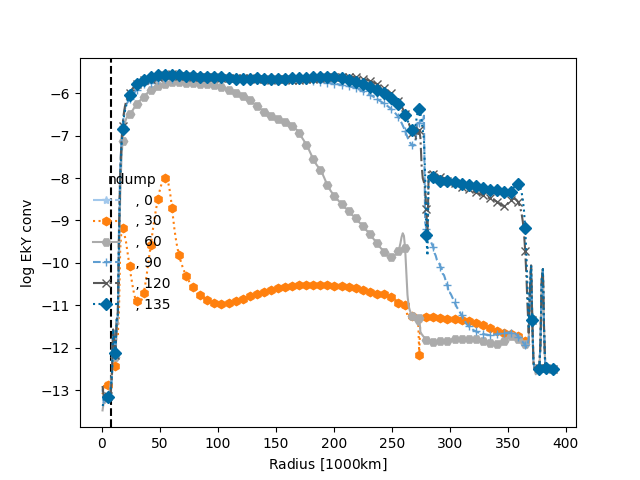

/home/user/PyPPM/ppmpy/ppm.py:1728: RuntimeWarning: divide by zero encountered in log10
  pl.plot(Y,np.log10(y),utils.linestyle(i+ls_offset)[0],


In [8]:
# plot a profile
ifig=113;close(ifig);figure(ifig)
#ything='FV H+He'
ything='EkY conv'
#cycs=[0,100]
Z1.prof_time(cycs,yaxis_thing=ything,radtop=8.0848,ifig=ifig,ls_offset=10,\
             logy=True)

#xlim(3.5,9.2)
#ylim(-4,0)    # FV H+He
#ylim(0.10209, 0.10262) # log A

In [9]:
Z1.Dinv?

<IPython.core.display.Javascript object>


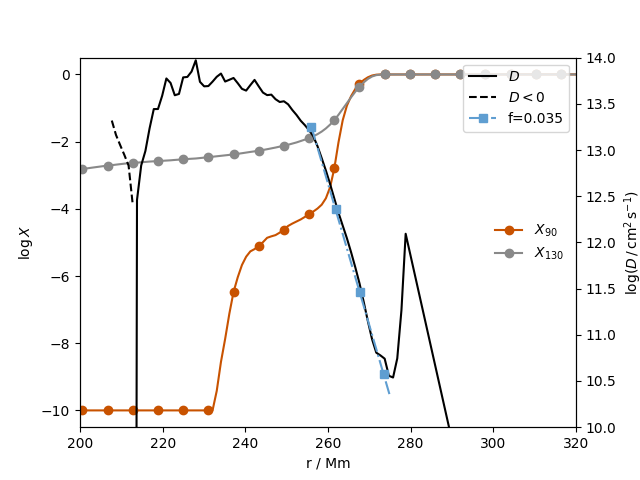

/home/user/PyPPM/ppmpy/ppm.py:3173: RuntimeWarning: divide by zero encountered in log10
  pl.plot(x/1.e8,np.log10(-D),'k--',
/home/user/PyPPM/ppmpy/ppm.py:3173: RuntimeWarning: invalid value encountered in log10
  pl.plot(x/1.e8,np.log10(-D),'k--',


(10, 14)

In [10]:
Z1.Dinv(90, 130, initial_conv_boundaries=False)
xlim(200,320)
ylim(10,14)

In [11]:
r0=256.e8
r_plot=linspace(r0/1.e8,275)

In [12]:
r = Z1.get('Y',fname=1,resolution='l')[::-1]
P = Z1.get('P',fname=1)[::-1] * 1.e19 # barye, centre to surface  
Hp = - P[1:] * np.diff(r) * 1.e8 / np.diff(P)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
ind0 = max(where(r[1:]<r0/1.e8)[0])
Hp0 = Hp[ind0]

<IPython.core.display.Javascript object>


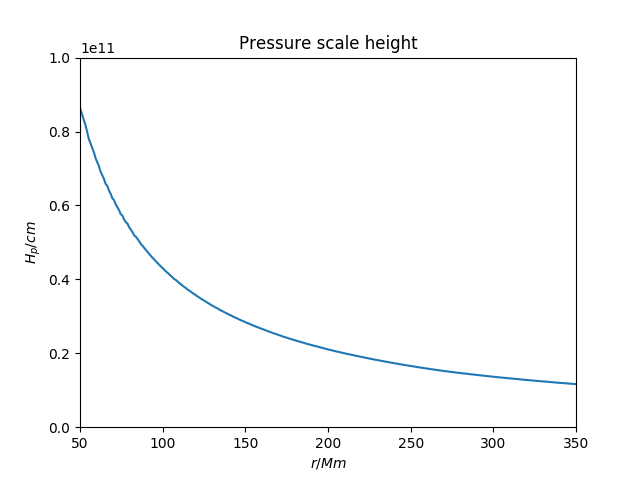

In [14]:
figure(111)
plot(r[1:],Hp)
xlim(50,350)
ylim(0,1e11)
xlabel('$r/Mm$')
ylabel('$H_p / cm$')       
title('Pressure scale height')

In [15]:
D = lambda x: D0*exp(-2*(x*1.e8-r0)/(f*Hp0))

In [16]:
f=0.035
D0=10**13.25

In [17]:
D0*exp(-2.*(r_plot[1:]*1.e8-r0)/(f*Hp0))

array([  1.55071984e+13,   1.35228020e+13,   1.17923411e+13,
         1.02833206e+13,   8.96740366e+12,   7.81987955e+12,
         6.81919968e+12,   5.94657296e+12,   5.18561292e+12,
         4.52203000e+12,   3.94336324e+12,   3.43874623e+12,
         2.99870312e+12,   2.61497063e+12,   2.28034291e+12,
         1.98853621e+12,   1.73407089e+12,   1.51216851e+12,
         1.31866213e+12,   1.14991802e+12,   1.00276744e+12,
         8.74447150e+11,   7.62547516e+11,   6.64967247e+11,
         5.79873949e+11,   5.05669713e+11,   4.40961107e+11,
         3.84533012e+11,   3.35325804e+11,   2.92415452e+11,
         2.54996173e+11,   2.22365294e+11,   1.93910064e+11,
         1.69096140e+11,   1.47457558e+11,   1.28587982e+11,
         1.12133073e+11,   9.77838358e+10,   8.52708149e+10,
         7.43590371e+10,   6.48435975e+10,   5.65458120e+10,
         4.93098622e+10,   4.29998691e+10,   3.74973414e+10,
         3.26989510e+10,   2.85145922e+10,   2.48656896e+10,
         2.16837231e+10]

In [18]:
figure(114)
plot(r_plot,log10(D(r_plot)),'-.',marker='s',markevery=15,color=cb(3),label='f=0.035')
legend(loc=0)

In [19]:
from nugridpy import utils as ut
cb = ut.colourblind

<IPython.core.display.Javascript object>


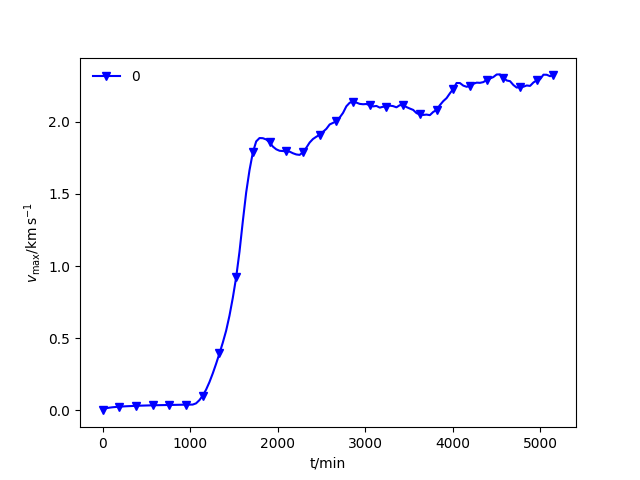

In [20]:
Z1.tvmax()

<IPython.core.display.Javascript object>


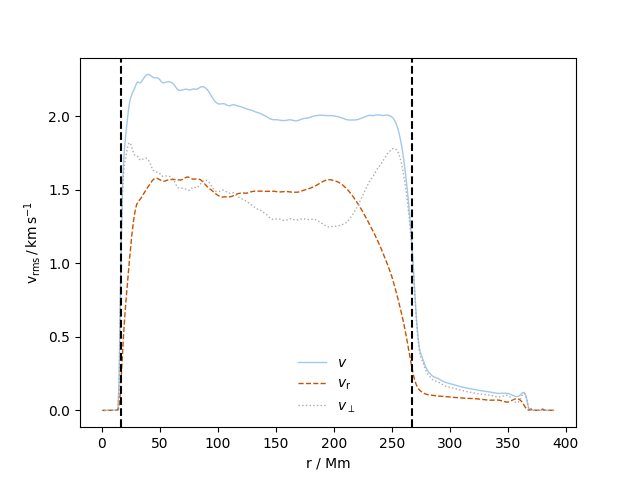

In [21]:
Z1.vprofs(130,ifig =12)

In [22]:
Z1.computeData?

In [23]:
YY=Z1

In [24]:
import numpy as np
from past.utils import old_div
def ma(YY,fname):
    mac = np.sqrt(
        YY.get('Ek conv',fname=fname)*2) /  \
        np.sqrt(
            5./3.*YY.get('P',fname=fname) /  \
            YY.get('Rho',fname=fname,resolution='L')
            )
    return mac

maxmach = 0.
maxvY = 0.
maxvXZ = 0.
avmach = []
vYmax = []
vXZmax = []
cycs = YY.cycles
rbot = 30.
rtop = 280.

# for skipping the part where the flow is not in a steady state (initial                                      
# transient), which looks to be until about 10 minutes from Robert's plots of                                 
# the radius of the upper boundary with time (fig 15 of the O shell paper)                                    
istart = np.abs( np.array( YY.cycles ) - 60 ).argmin()
cycs = cycs[istart:]

for i in cycs:
    r = YY.get('Y',i,resolution='L')
    idxtop = np.abs( r - rtop ).argmin()
    idxbot = np.abs( r - rbot ).argmin()
    imid = old_div(( idxtop + idxbot ),2)
    r = r[idxtop:idxbot]
    dr = np.average(-np.diff(r))
    mach = ma(YY,i)
    vY = np.sqrt( YY.get('EkY',fname=i,resolution='L' ) )
    vXZ = np.sqrt( YY.get('EkXZ',fname=i,resolution='L' ) )
    mach = mach[idxtop:idxbot]
    vY = vY[idxtop:idxbot]
    vXZ = vXZ[idxtop:imid] # only top half                                                                    
    maxmach = max( maxmach, np.max(mach) )
    maxvY = max( maxvY, np.max(vY) )
    maxvXZ = max( maxvXZ, np.max(vXZ) )
    vYmax.append(maxvY)
    vXZmax.append(maxvXZ)
    av = mach * 4. * np.pi * r ** 2 * dr
    av = np.sum( av )
    vol = 4./3. * np.pi * ( r[0]**3 - r[-1]**3 )
    av = av / vol
    avmach.append(av)

mbar = np.average( avmach )

print('maximum mach number = ', maxmach)
print( 'average mach number = ', mbar)
print( 'maximum radial velocity = ', maxvY * 1.e3, 'km/s')
print( 'maximum tangential velocity = ', maxvXZ * 1.e3, 'km/s')


maximum mach number =  0.00407430403946
average mach number =  0.00193118599909
maximum radial velocity =  1.6832735963 km/s
maximum tangential velocity =  1.99498370921 km/s


In [25]:
# The Z1 run made this many cycles
135*2334

315090

Each dump is about 10% fewer cycles compared to O-shell runs.